In [2]:
# Import dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
import pgeocode




In [3]:
# Import the data from the CSV file
mls_df = pd.read_csv("Clean_Data/mls_cleaned.csv")
mls_df.head()

C:\Users\David\AppData\Local\Temp\ipykernel_12408\574837584.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  mls_df = pd.read_csv("Clean_Data/mls_cleaned.csv")


,Mortgage Rates,MLS #,Property Type,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
0,2.65,2326882,Single Family Residence,Raleigh,27608,3,4,2450,1,2020,2020-06-24,2021-01-04,700000,770796,194,70796,35.8077,-78.6463
1,2.65,2355109,Single Family Residence,Holly Springs,27540,6,6,4100,3,2012,2020-11-23,2021-01-08,890000,955000,46,65000,35.6263,-78.8458
2,2.65,2354513,Single Family Residence,Durham,27705,4,5,4433,5,2017,2020-11-19,2021-01-05,1219075,1275000,47,55925,36.0218,-78.9478
3,2.65,2345181,Single Family Residence,Chapel Hill,27514,4,3,2314,3,1970,2020-09-27,2021-01-04,680000,730000,99,50000,35.9203,-79.0372
4,2.65,2354571,Single Family Residence,Cary,27519,5,4,3795,1,2009,2020-11-20,2021-01-04,549900,590000,45,40100,35.8072,-78.8870


In [4]:
# Copy the data frame to a new data frame
condo_df = mls_df.copy()

# Keep only the 'Single Family Residence' values in column 'Property Type'
condo_df = condo_df[condo_df['Property Type'] == 'Condo']

# Drop the 'Property Type' column
condo_df = condo_df.drop(columns=['Property Type'])


condo_df.head()

,Mortgage Rates,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
38,2.65,2358250,Elon,27244,3,2,1166,1,1986,2020-12-17,2021-01-07,180000,197500,21,17500,36.1029,-79.5067
65,2.65,2202465,Raleigh,27601,2,2,1251,1,2018,2018-07-09,2021-01-08,575500,587702,914,12202,35.7727,-78.6324
103,2.65,2170728,Raleigh,27601,2,2,1251,1,2018,2018-02-01,2021-01-08,535000,543546,1072,8546,35.7727,-78.6324
131,2.65,2175010,Cary,27511,2,2,1631,1,2019,2018-02-25,2021-01-05,450000,455904,1045,5904,35.7641,-78.7786
136,2.65,2355989,Raleigh,27609,2,2,942,1,1972,2020-12-02,2021-01-07,120000,125200,36,5200,35.8480,-78.6317


In [5]:
condo_df['City'].value_counts()

City
Raleigh                2021
Chapel Hill             646
Durham                  430
Cary                    328
Burlington               99
Carrboro                 58
Morrisville              55
Fayetteville             43
Wake Forest              36
Clayton                  29
Greensboro               29
Apex                     26
Gibsonville              24
Fuquay Varina            20
Saxapahaw                19
Holly Springs            14
Hillsborough             12
Benson                   12
Elon                     11
Pittsboro                10
Mebane                    9
Garner                    9
Graham                    8
Atlantic Beach            7
Carolina Beach            6
Clarksville               6
Greenville                4
Sanford                   4
Charlotte                 4
Wilson                    4
Winston Salem             3
Whitsett                  2
Spring Lake               2
Kernersville              2
Goldsboro                 2
Wilmington     

In [6]:
#Remove all rows corresponding to cities with less than 8 listings
condo_df = condo_df[condo_df['City'].map(condo_df['City'].value_counts()) > 7]
condo_df['City'].value_counts()

City
Raleigh          2021
Chapel Hill       646
Durham            430
Cary              328
Burlington         99
Carrboro           58
Morrisville        55
Fayetteville       43
Wake Forest        36
Greensboro         29
Clayton            29
Apex               26
Gibsonville        24
Fuquay Varina      20
Saxapahaw          19
Holly Springs      14
Hillsborough       12
Benson             12
Elon               11
Pittsboro          10
Mebane              9
Garner              9
Graham              8
Name: count, dtype: int64

In [7]:
condo_df.describe()

,Mortgage Rates,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
count,3948.000000,3948.000000,3948.000000,3948.000000,3948.000000,3948.00000,3948.000000,3.948000e+03,3.948000e+03,3948.000000,3948.000000,3948.000000,3948.000000
mean,4.849835,27580.205420,2.111196,2.139311,1210.187690,1.04306,1999.050152,3.167177e+05,3.189851e+05,90.319402,2267.356890,35.846588,-78.817174
std,1.763893,123.639589,0.739453,0.796715,546.626296,0.38881,408.200796,2.073413e+05,2.059113e+05,163.403009,20887.539864,0.132377,0.232604
min,2.650000,27215.000000,0.000000,1.000000,-19996.000000,1.00000,1854.000000,4.500000e+04,4.950000e+04,0.000000,-200000.000000,35.025700,-79.908600
25%,3.020000,27517.000000,2.000000,2.000000,939.000000,1.00000,1984.000000,1.967500e+05,2.000000e+05,33.000000,-5000.000000,35.772700,-78.947800
50%,5.090000,27604.000000,2.000000,2.000000,1147.000000,1.00000,1998.000000,2.650000e+05,2.682500e+05,45.000000,0.000000,35.852000,-78.744700
75%,6.690000,27613.000000,3.000000,3.000000,1404.250000,1.00000,2006.000000,3.750000e+05,3.750000e+05,72.000000,9924.750000,35.918200,-78.653000
max,7.790000,28365.000000,5.000000,7.000000,4532.000000,8.00000,27606.000000,2.600000e+06,2.600000e+06,1478.000000,500000.000000,36.156600,-78.098300


In [8]:
condo_df = condo_df[condo_df['SqFt'] > 100]
condo_df = condo_df[condo_df['Bedrooms'] > 0]
condo_df = condo_df[condo_df['Total Baths'] > 0]
condo_df = condo_df[condo_df['Year Built'] <= 2024]
condo_df.describe()

,Mortgage Rates,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon
count,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000,3938.000000,3.938000e+03,3.938000e+03,3938.000000,3938.000000,3938.000000,3938.000000
mean,4.846905,27580.116557,2.115033,2.141696,1217.242255,1.042915,1992.544439,3.169953e+05,3.192828e+05,89.813865,2287.503301,35.846326,-78.816771
std,1.763358,123.681255,0.735004,0.795743,428.920502,0.388999,21.339585,2.075015e+05,2.060624e+05,162.106696,20904.976463,0.132369,0.232142
min,2.650000,27215.000000,1.000000,1.000000,317.000000,1.000000,1854.000000,4.500000e+04,4.950000e+04,0.000000,-200000.000000,35.025700,-79.908600
25%,3.020000,27517.000000,2.000000,2.000000,940.000000,1.000000,1984.000000,1.975000e+05,2.000000e+05,33.000000,-5000.000000,35.772700,-78.947800
50%,5.090000,27604.000000,2.000000,2.000000,1148.000000,1.000000,1998.000000,2.650000e+05,2.690000e+05,45.000000,0.000000,35.852000,-78.744700
75%,6.690000,27613.000000,3.000000,3.000000,1405.000000,1.000000,2006.000000,3.750000e+05,3.750000e+05,72.000000,10000.000000,35.918200,-78.653000
max,7.790000,28365.000000,5.000000,7.000000,4532.000000,8.000000,2024.000000,2.600000e+06,2.600000e+06,1478.000000,500000.000000,36.156600,-78.098300


In [9]:
condo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3938 entries, 38 to 141292
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Mortgage Rates  3938 non-null   float64
 1   MLS #           3938 non-null   object 
 2   City            3938 non-null   object 
 3   Zip             3938 non-null   int64  
 4   Bedrooms        3938 non-null   int64  
 5   Total Baths     3938 non-null   int64  
 6   SqFt            3938 non-null   int64  
 7   Acres           3938 non-null   int64  
 8   Year Built      3938 non-null   int64  
 9   List Date       3938 non-null   object 
 10  Closing Date    3938 non-null   object 
 11  List Price      3938 non-null   int64  
 12  Sold Price      3938 non-null   int64  
 13  Days on Market  3938 non-null   int64  
 14  Over Asking     3938 non-null   int64  
 15  Lat             3938 non-null   float64
 16  Lon             3938 non-null   float64
dtypes: float64(3), int64(10), object(4)

In [10]:
#Create a copy of the data frame and drop the non-numeric columns
condo_nostr_df = condo_df.copy()
condo_nostr_df = condo_nostr_df.drop(columns=['City'])
condo_nostr_df = condo_nostr_df.drop(columns=['List Date'])
condo_nostr_df = condo_nostr_df.drop(columns=['Closing Date'])
condo_nostr_df = condo_nostr_df.drop(columns=['MLS #'])

#Create a correlation matrix
corr_matrix = condo_nostr_df.corr()
corr_matrix["Sold Price"].sort_values(ascending=False)

Sold Price        1.000000
List Price        0.994914
SqFt              0.617797
Year Built        0.319532
Total Baths       0.308747
Days on Market    0.266986
Bedrooms          0.197030
Mortgage Rates    0.153456
Lon               0.093571
Lat               0.034427
Acres             0.032234
Zip               0.030548
Over Asking      -0.018355
Name: Sold Price, dtype: float64

array([[<Axes: xlabel='Sold Price', ylabel='Sold Price'>,
        <Axes: xlabel='SqFt', ylabel='Sold Price'>,
        <Axes: xlabel='Total Baths', ylabel='Sold Price'>,
        <Axes: xlabel='Bedrooms', ylabel='Sold Price'>,
        <Axes: xlabel='Lat', ylabel='Sold Price'>,
        <Axes: xlabel='Lon', ylabel='Sold Price'>],
       [<Axes: xlabel='Sold Price', ylabel='SqFt'>,
        <Axes: xlabel='SqFt', ylabel='SqFt'>,
        <Axes: xlabel='Total Baths', ylabel='SqFt'>,
        <Axes: xlabel='Bedrooms', ylabel='SqFt'>,
        <Axes: xlabel='Lat', ylabel='SqFt'>,
        <Axes: xlabel='Lon', ylabel='SqFt'>],
       [<Axes: xlabel='Sold Price', ylabel='Total Baths'>,
        <Axes: xlabel='SqFt', ylabel='Total Baths'>,
        <Axes: xlabel='Total Baths', ylabel='Total Baths'>,
        <Axes: xlabel='Bedrooms', ylabel='Total Baths'>,
        <Axes: xlabel='Lat', ylabel='Total Baths'>,
        <Axes: xlabel='Lon', ylabel='Total Baths'>],
       [<Axes: xlabel='Sold Price', ylabel='Be

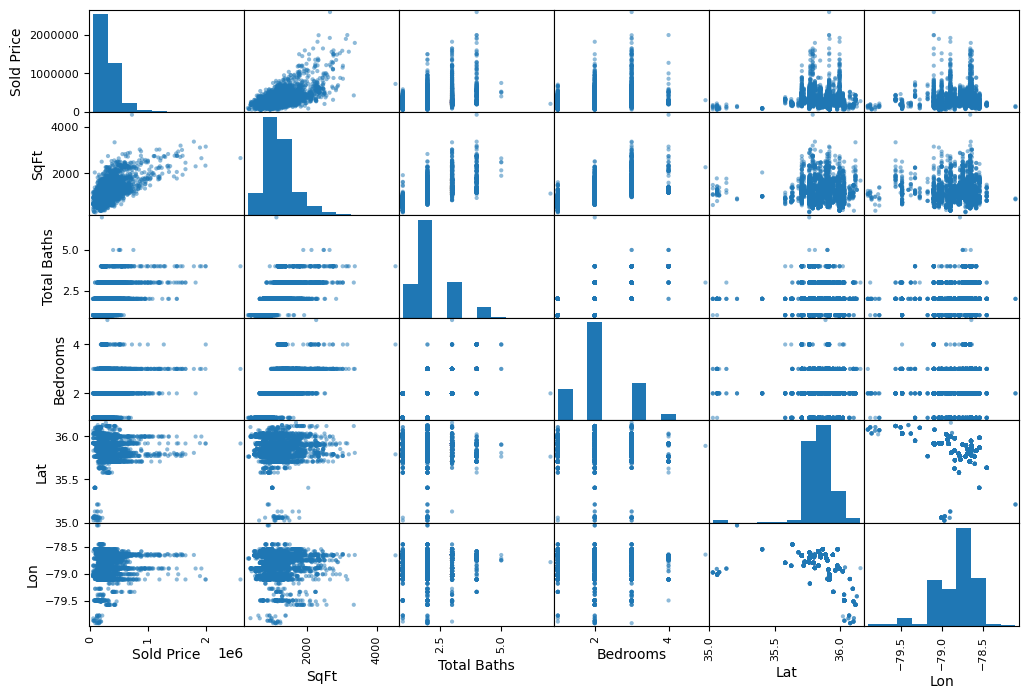

In [11]:
#Visualize the scatter matrix
scatter_columns = ["Sold Price", "SqFt", "Total Baths", "Bedrooms", 'Lat', 'Lon']
scatter_matrix(condo_nostr_df[scatter_columns], figsize=(12, 8))
#plt.savefig('matrix.png')

<Axes: xlabel='SqFt', ylabel='Sold Price'>

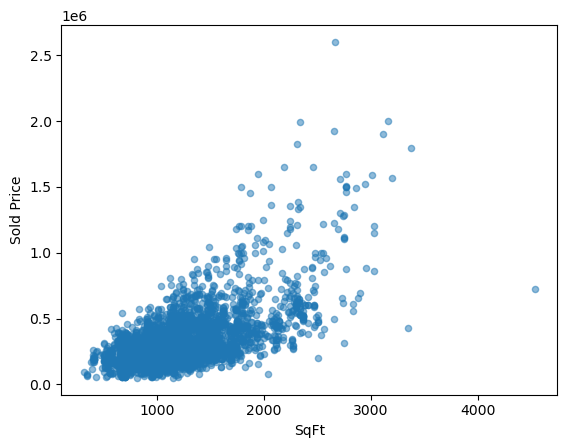

In [12]:
#Visualize the scatter plot for Total Living Area SqFt vs Sold Price
condo_nostr_df.plot(kind="scatter", x="SqFt", y="Sold Price", alpha=0.5)
#plt.savefig('scatter.png')

In [13]:
#Create a new column for the price per square foot
condo_nostr_df['Price per SqFt'] = condo_nostr_df['Sold Price'] / condo_nostr_df['SqFt']

#Create a correlation matrix to see what the correlation is for Price per SqFt
corr_matrix = condo_nostr_df.corr()
corr_matrix["Sold Price"].sort_values(ascending=False)

Sold Price        1.000000
List Price        0.994914
Price per SqFt    0.706244
SqFt              0.617797
Year Built        0.319532
Total Baths       0.308747
Days on Market    0.266986
Bedrooms          0.197030
Mortgage Rates    0.153456
Lon               0.093571
Lat               0.034427
Acres             0.032234
Zip               0.030548
Over Asking      -0.018355
Name: Sold Price, dtype: float64

In [14]:
#Check the orginal data frame to see how many cities are in the data
len(condo_df['City'].value_counts())

23

c:\Users\David\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


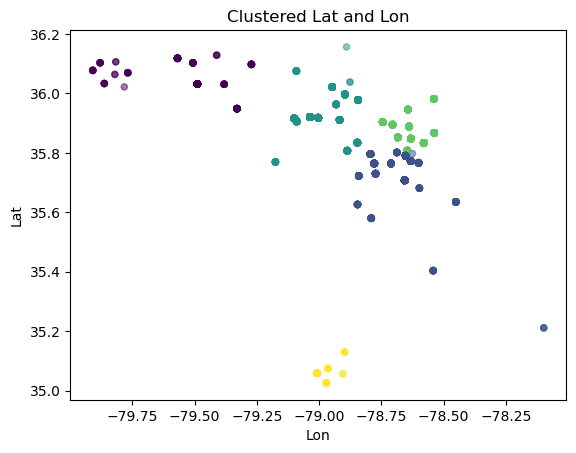

In [15]:
#Cluster the Lat and  Lon into groups
from sklearn.cluster import KMeans
condo_df['Cluster'] = KMeans(n_clusters=5).fit_predict(condo_df[['Lat', 'Lon']])
condo_df.plot(kind="scatter", x="Lon", y="Lat", c="Cluster", cmap='viridis', colorbar=False, alpha=0.5)
plt.title('Clustered Lat and Lon')
plt.savefig('condos_clustered.png')


In [16]:
#Create a variable for the top 373 cities (effectively all cities) with the highest average sold price
top373 = condo_df.groupby('City')['Sold Price'].mean().nlargest(373).reset_index()

#Plot the top 373 (all) cities with the highest average sold price
fig = px.bar(top373, x='City', y='Sold Price',color='City', template='plotly',
             title='Cities with Highest Avg. Sold Price') 
fig.update_traces(textposition='outside')
fig.show()

In [17]:
top373 = condo_df.groupby('City')['Total Baths'].mean().nlargest(373).reset_index()

fig = px.bar(top373, x='City', y='Total Baths',color='Total Baths', template='plotly', 
             title='Cities with the Most Avg Total Baths')
fig.update_traces(texttemplate='%{y:.}', textposition='outside')
fig.show()

In [18]:
df_mean = condo_df.groupby('Over Asking')['SqFt'].mean().reset_index()

fig = px.scatter(df_mean, x='Over Asking', y='SqFt', trendline='ols', 
                 labels={'Over Asking':'Over Asking', 'SqFt':'Mean House Size'})
fig.update_layout(title='Distribution of Mean House Size by Over Asking')
fig.show()

In [19]:
fig = px.scatter(condo_df, x='SqFt', y='Over Asking', color='Bedrooms', size='Total Baths',trendline='ols')
fig.update_layout(title='House Size vs Over Asking',
                  xaxis_title='House Size',
                  yaxis_title='Over Asking')
fig.show()

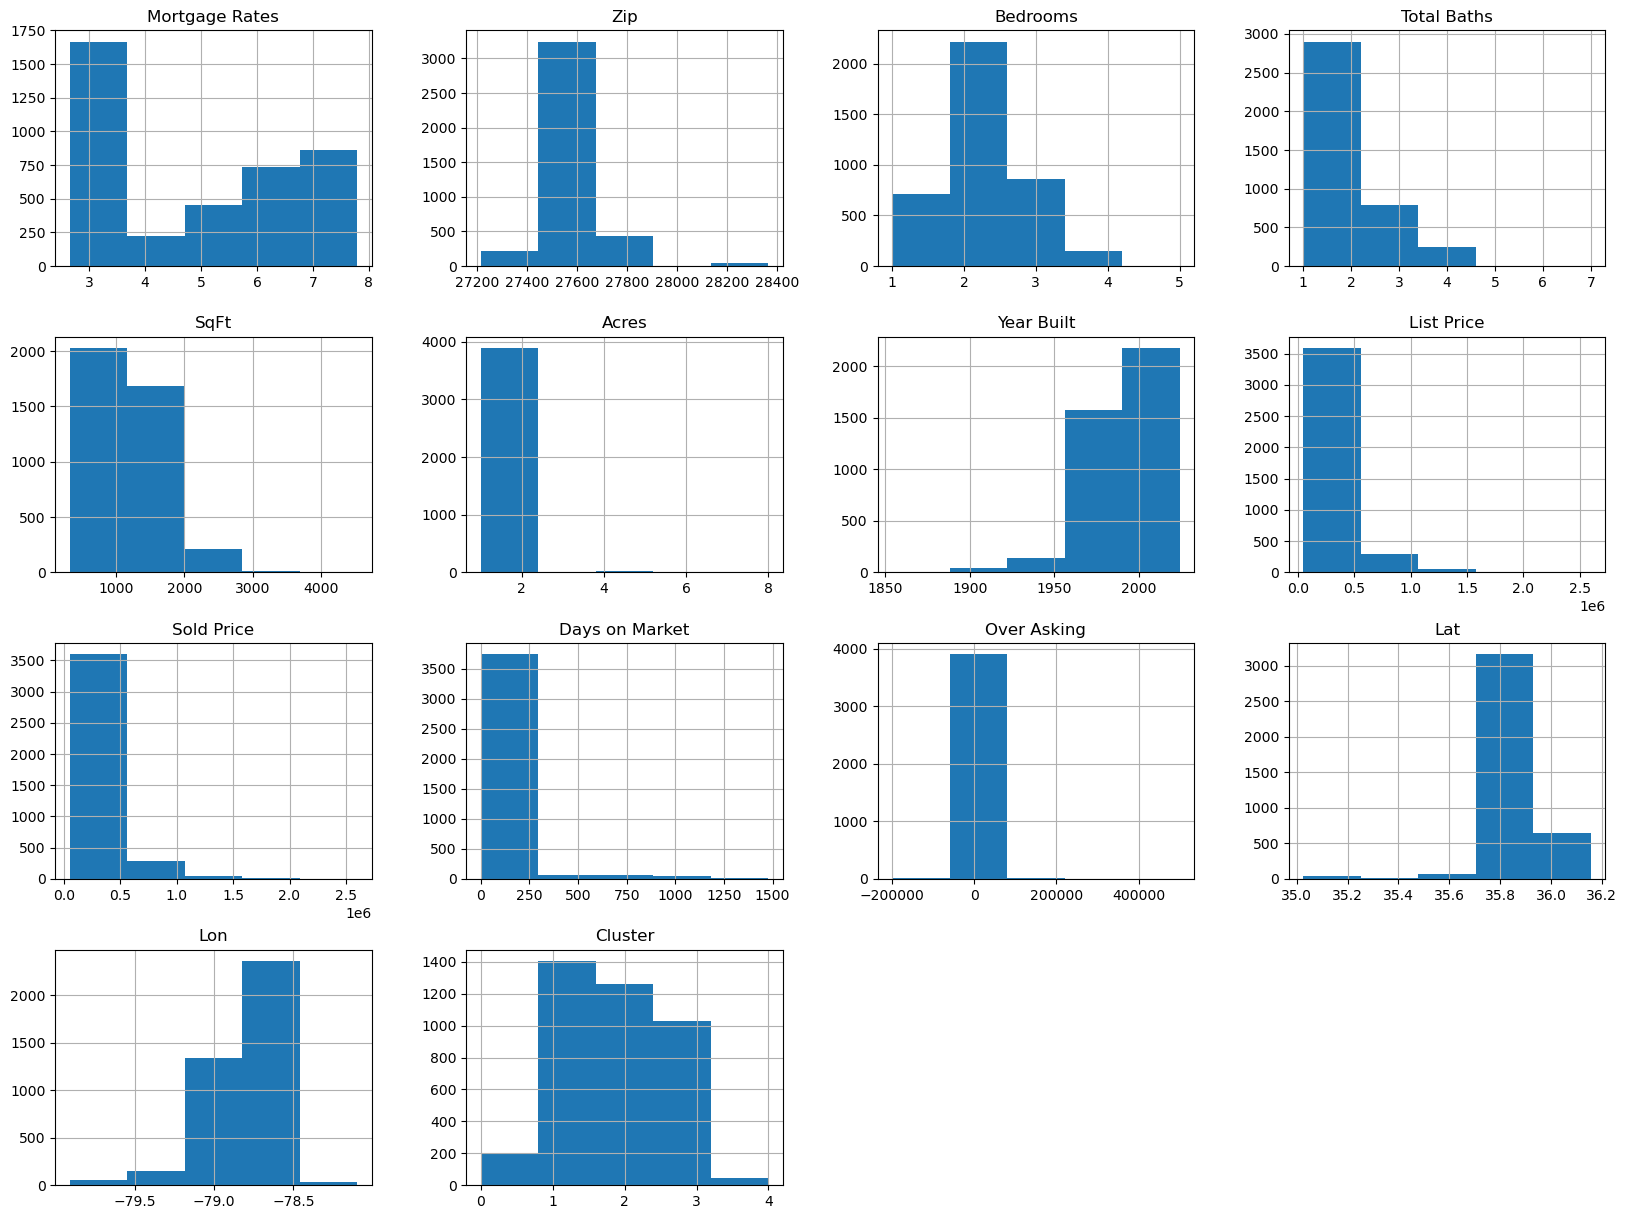

In [20]:
condo_df.hist(bins=5, figsize=(20,15))
#plt.savefig("attribute_histogram_plots")
plt.show()

In [21]:
condo_df.head()

,Mortgage Rates,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster
38,2.65,2358250,Elon,27244,3,2,1166,1,1986,2020-12-17,2021-01-07,180000,197500,21,17500,36.1029,-79.5067,0
65,2.65,2202465,Raleigh,27601,2,2,1251,1,2018,2018-07-09,2021-01-08,575500,587702,914,12202,35.7727,-78.6324,1
103,2.65,2170728,Raleigh,27601,2,2,1251,1,2018,2018-02-01,2021-01-08,535000,543546,1072,8546,35.7727,-78.6324,1
131,2.65,2175010,Cary,27511,2,2,1631,1,2019,2018-02-25,2021-01-05,450000,455904,1045,5904,35.7641,-78.7786,1
136,2.65,2355989,Raleigh,27609,2,2,942,1,1972,2020-12-02,2021-01-07,120000,125200,36,5200,35.8480,-78.6317,3


In [22]:
# Variable with the Longitude and Latitude
X=condo_df.loc[:,['MLS #','Lat','Lon']]
X.head(10)

,MLS #,Lat,Lon
38,2358250,36.1029,-79.5067
65,2202465,35.7727,-78.6324
103,2170728,35.7727,-78.6324
131,2175010,35.7641,-78.7786
136,2355989,35.8480,-78.6317
199,2353501,35.8673,-78.5381
221,2202378,35.7641,-78.7786
237,2214749,35.7641,-78.7786
273,2228380,35.7641,-78.7786
280,2345029,35.7076,-78.6563


c:\Users\David\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\David\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\David\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\David\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\David\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.

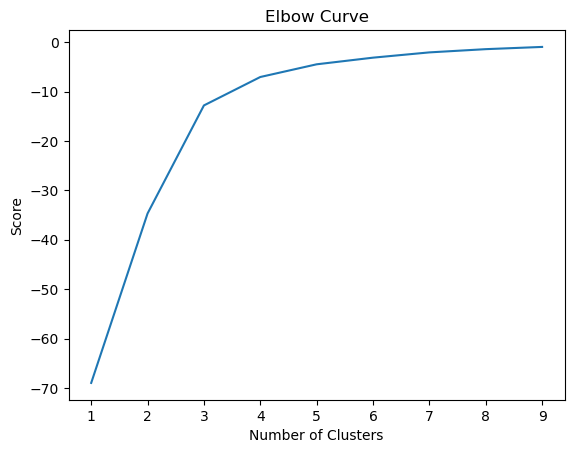

In [23]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = condo_df[['Lat']]
X_axis = condo_df[['Lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [24]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(X[X.columns[1:3]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[1:3]]) # Labels of each point
X.head(10)

c:\Users\David\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\David\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,MLS #,Lat,Lon,cluster_label
38,2358250,36.1029,-79.5067,2
65,2202465,35.7727,-78.6324,0
103,2170728,35.7727,-78.6324,0
131,2175010,35.7641,-78.7786,0
136,2355989,35.8480,-78.6317,0
199,2353501,35.8673,-78.5381,0
221,2202378,35.7641,-78.7786,0
237,2214749,35.7641,-78.7786,0
273,2228380,35.7641,-78.7786,0
280,2345029,35.7076,-78.6563,0


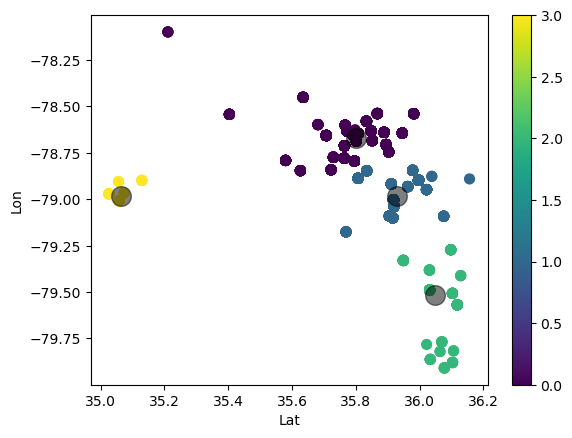

In [25]:
X.plot.scatter(x = 'Lat', y = 'Lon', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

<Axes: xlabel='SqFt'>

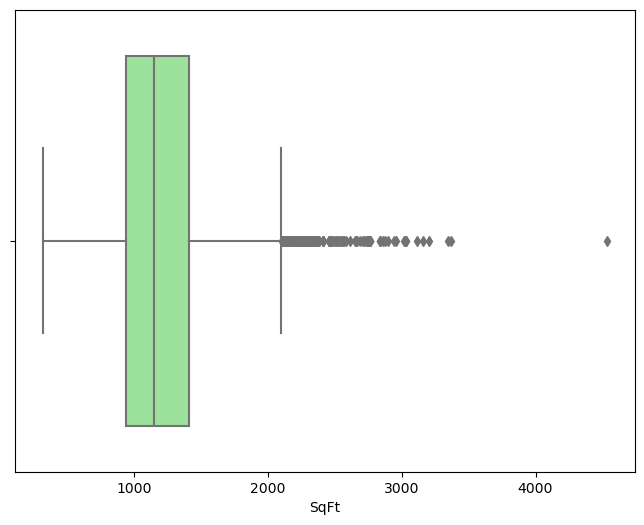

In [26]:
#Visualize the distribution of each numerical feature using box plots. Points beyond the “whiskers” of the box plot can be considered potential outliers.  
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['SqFt'], color='lightgreen')

<Axes: xlabel='Bedrooms'>

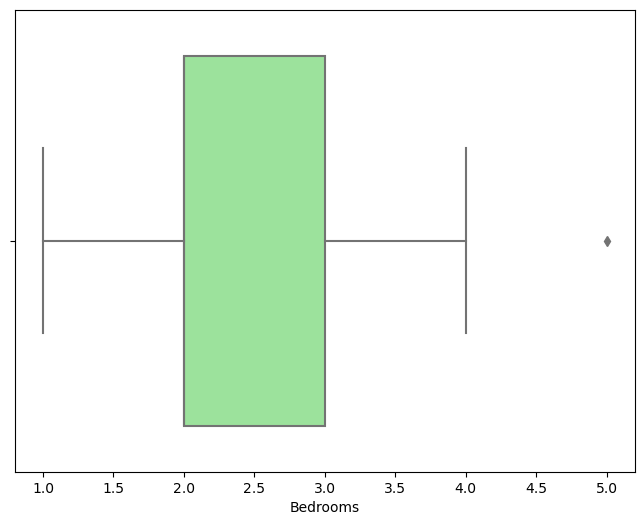

In [27]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['Bedrooms'], color='lightgreen')

<Axes: xlabel='Total Baths'>

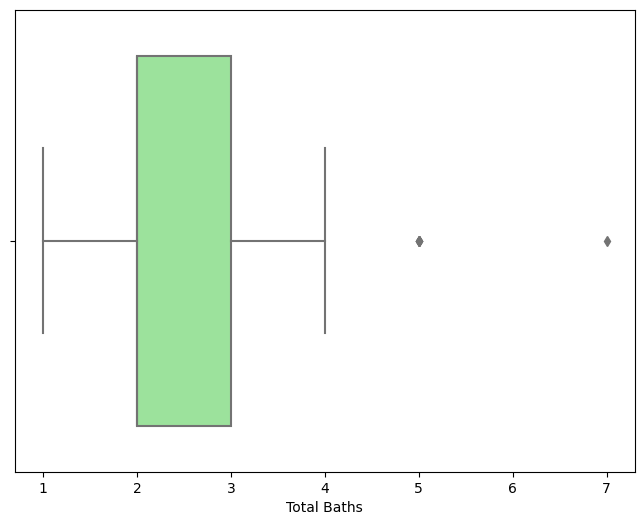

In [28]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['Total Baths'], color='lightgreen')

<Axes: xlabel='Acres'>

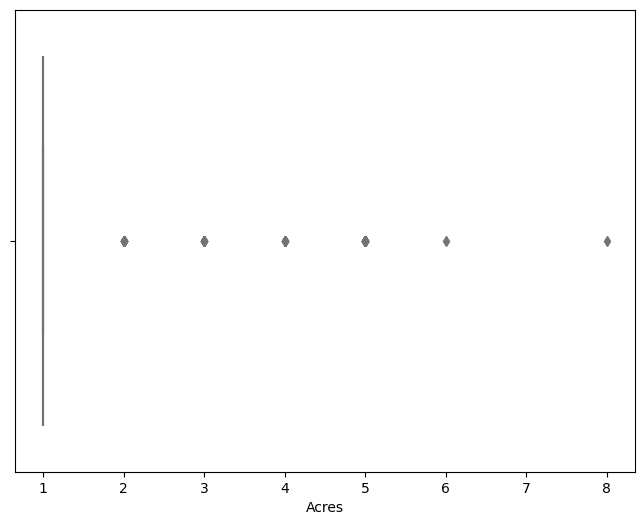

In [29]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['Acres'], color='lightgreen')

<Axes: xlabel='Days on Market'>

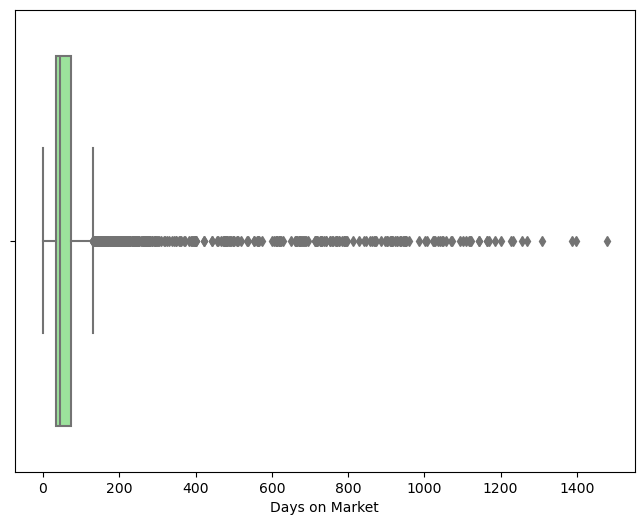

In [30]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['Days on Market'], color='lightgreen')

<Axes: xlabel='Year Built'>

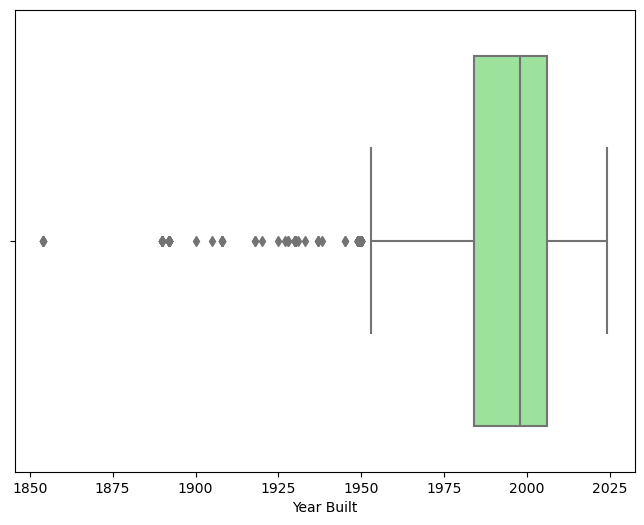

In [31]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(x=condo_df['Year Built'], color='lightgreen')

In [32]:
condo_df.sort_values('Year Built', ascending=True)

,Mortgage Rates,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster
116984,7.49,2532212,Wake Forest,27587,1,1,700,1,1854,2023-09-14,2023-10-05,299900,300000,21,100,35.9815,-78.5392,3
59365,5.11,2430251,Wake Forest,27587,2,3,965,1,1854,2022-02-07,2022-04-21,300000,311000,73,11000,35.9815,-78.5392,3
122388,7.03,2542065,Wake Forest,27587,2,3,876,1,1854,2023-11-15,2023-12-08,325000,325000,23,0,35.9815,-78.5392,3
5552,2.97,2362406,Wake Forest,27587,3,2,1205,1,1854,2021-01-18,2021-02-25,285000,285000,38,0,35.9815,-78.5392,3
38477,3.14,2408616,Wake Forest,27587,1,1,648,1,1854,2021-09-17,2021-10-29,225000,251500,42,26500,35.9815,-78.5392,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141292,6.87,10004596,Raleigh,27606,2,2,1164,1,2023,2024-01-05,2024-06-17,529900,513000,164,-16900,35.7645,-78.7112,1
137343,7.02,10029316,Fuquay Varina,27526,2,2,1070,1,2024,2024-05-15,2024-05-15,380900,380900,0,0,35.5800,-78.7908,1
132643,6.82,10006495,Wake Forest,27587,3,3,2410,1,2024,2024-01-16,2024-04-04,380000,380000,79,0,35.9815,-78.5392,3
132851,6.82,2463504,Raleigh,27606,2,3,1371,1,2024,2022-07-20,2024-04-02,460000,450000,622,-10000,35.7645,-78.7112,1


In [33]:
condo_df.sort_values('Year Built', ascending=False)

,Mortgage Rates,MLS #,City,Zip,Bedrooms,Total Baths,SqFt,Acres,Year Built,List Date,Closing Date,List Price,Sold Price,Days on Market,Over Asking,Lat,Lon,Cluster
132643,6.82,10006495,Wake Forest,27587,3,3,2410,1,2024,2024-01-16,2024-04-04,380000,380000,79,0,35.9815,-78.5392,3
139581,6.99,10025965,Fuquay Varina,27526,1,1,681,5,2024,2024-04-29,2024-06-06,225000,250000,38,25000,35.5800,-78.7908,1
137343,7.02,10029316,Fuquay Varina,27526,2,2,1070,1,2024,2024-05-15,2024-05-15,380900,380900,0,0,35.5800,-78.7908,1
132851,6.82,2463504,Raleigh,27606,2,3,1371,1,2024,2022-07-20,2024-04-02,460000,450000,622,-10000,35.7645,-78.7112,1
98705,6.39,2487465,Raleigh,27612,3,3,2470,1,2023,2022-12-16,2023-04-17,595000,595050,122,50,35.8520,-78.6841,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5552,2.97,2362406,Wake Forest,27587,3,2,1205,1,1854,2021-01-18,2021-02-25,285000,285000,38,0,35.9815,-78.5392,3
59365,5.11,2430251,Wake Forest,27587,2,3,965,1,1854,2022-02-07,2022-04-21,300000,311000,73,11000,35.9815,-78.5392,3
38477,3.14,2408616,Wake Forest,27587,1,1,648,1,1854,2021-09-17,2021-10-29,225000,251500,42,26500,35.9815,-78.5392,3
116984,7.49,2532212,Wake Forest,27587,1,1,700,1,1854,2023-09-14,2023-10-05,299900,300000,21,100,35.9815,-78.5392,3


In [34]:
# Save the DataFrame to a CSV file
condo_df.to_csv('Clean_Data/mls_condo_cleaned_2.csv', index=False)